<a href="https://colab.research.google.com/github/EJBass2003/CIS-3902-AI-ML-Eric-Bass/blob/main/Data_Cleaning_Exercise_Class_EB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning in Python — Exercise

**Course:** Intro to Data Mining  
**Dataset:** Heart Failure Prediction dataset (loaded from a public URL — no file downloads needed!)  

---


# YOUR TURN: Practice Exercise

Now apply the same data cleaning pipeline from the Titanic exercise to a **new dataset**: the **Heart Failure Prediction** dataset.

This dataset combines 5 heart disease databases (918 patients total) and contains medical information about patients and whether or not they have heart disease. It has **text columns that need encoding**, potential outliers, and some tricky data quality issues — perfect for practicing everything we just learned.

**Your tasks** (follow the same steps from above):

1. Load the data and take a first look
2. Understand the data types and structure
3. Get descriptive statistics
4. Check for duplicates
5. Handle missing values (decide: drop column, drop row, or impute?)
6. Encode any categorical (`object`) columns
7. Detect and handle outliers
8. Scale the numerical features

The starter code below loads the dataset for you. The rest is up to you!

> **Hints:** Pay close attention to `.describe()` — not all missing values show up as NaN! Also, this dataset was made by combining multiple hospital databases, so check for duplicates.

### About the Heart Failure Prediction Dataset

| Column | Description | Type |
|--------|-------------|------|
| Age | Age in years | Numerical |
| Sex | M = Male, F = Female | Categorical |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | Categorical |
| RestingBP | Resting blood pressure (mm Hg) | Numerical |
| Cholesterol | Serum cholesterol (mg/dl) | Numerical |
| FastingBS | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Numerical |
| RestingECG | Normal, ST = ST-T wave abnormality, LVH = left ventricular hypertrophy | Categorical |
| MaxHR | Maximum heart rate achieved | Numerical |
| ExerciseAngina | Y = Yes, N = No | Categorical |
| Oldpeak | ST depression induced by exercise | Numerical |
| ST_Slope | Up = upsloping, Flat = flat, Down = downsloping | Categorical |
| HeartDisease | 1 = heart disease, 0 = no heart disease (TARGET) | Numerical |

### Step 1: Load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'

heart = pd.read_csv(url)

print(f'Dataset shape: {heart.shape[0]} rows x {heart.shape[1]} columns')
heart.head()

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [4]:
# YOUR CODE HERE
# Hint: heart.info()
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.

In [5]:
# YOUR CODE HERE
# Hint: heart.describe()
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [6]:
# YOUR CODE HERE
# Hint: heart.duplicated().sum()
# To remove: heart = heart.drop_duplicates()
num_duplicates = heart.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

heart = heart.drop_duplicates()

Number of duplicate rows: 0


### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [8]:
# YOUR CODE HERE
# Step 1: Find missing value percentages
# Hint: (heart.isnull().sum() / len(heart)) * 100

missing_pct = (heart.isnull().sum() / len(heart)) * 100
missing_pct = missing_pct.round(2)

print('Percentage of missing values per column:')
print(missing_pct[missing_pct > 0])

# Step 2: Decide and apply your strategy for each column with missing values
# Drop columns that aren't useful for analysis
cols_to_drop = ['FastingBS']
heart_clean = heart.drop(columns=cols_to_drop)

print(f'Shape before: {heart.shape}')
print(f'Shape after:  {heart_clean.shape}')
heart_clean.head()

Percentage of missing values per column:
Series([], dtype: float64)
Shape before: (918, 12)
Shape after:  (918, 11)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


### Step 6: Encode categorical variables

Check if any columns are `object` type. If so, decide whether to use label encoding or one-hot encoding.

Hint: Look at `.info()` output — how many unique values does each `object` column have?

In [20]:
# YOUR CODE HERE
# Hint: Check for object columns with:
# heart.select_dtypes(include='object').columns
#
# For 2 categories: heart['col'] = heart['col'].map({'val1': 0, 'val2': 1})
# For 3+ categories: heart = pd.get_dummies(heart, columns=['col'], drop_first=True)
#
# Think about which columns have 2 categories vs. 3+ categories

current_object_cols = heart_clean.select_dtypes(include='object').columns.tolist()

if 'Sex' in current_object_cols:
    heart_clean['Sex'] = heart_clean['Sex'].map({'M': 0, 'F': 1})

if 'ExerciseAngina' in current_object_cols:

    heart_clean['ExerciseAngina'] = heart_clean['ExerciseAngina'].map({'N': 0, 'Y': 1})

cols_for_onehot = heart_clean.select_dtypes(include='object').columns.tolist()

if cols_for_onehot:
    heart_clean = pd.get_dummies(heart_clean, columns=cols_for_onehot, drop_first=True)

print('\nAfter encoding:')
print(heart_clean.head())
print(heart_clean.info())


After encoding:
   Age  Sex  RestingBP  Cholesterol  MaxHR  ExerciseAngina  Oldpeak  \
0   40    0        140          289    172               0      0.0   
1   49    1        160          180    156               0      1.0   
2   37    0        130          283     98               0      0.0   
3   48    1        138          214    108               1      1.5   
4   54    0        150          195    122               0      0.0   

   HeartDisease  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0             0               True              False             False   
1             1              False               True             False   
2             0               True              False             False   
3             1              False              False             False   
4             0              False               True             False   

   RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  ST_Slope_Up  
0               True          False    

### Step 7: Detect and handle outliers

Pick 2-3 numerical columns (e.g., `trestbps`, `chol`, `thalach`). Create box plots and use the IQR method.

Remember: think about whether outliers are real data or errors before removing them!

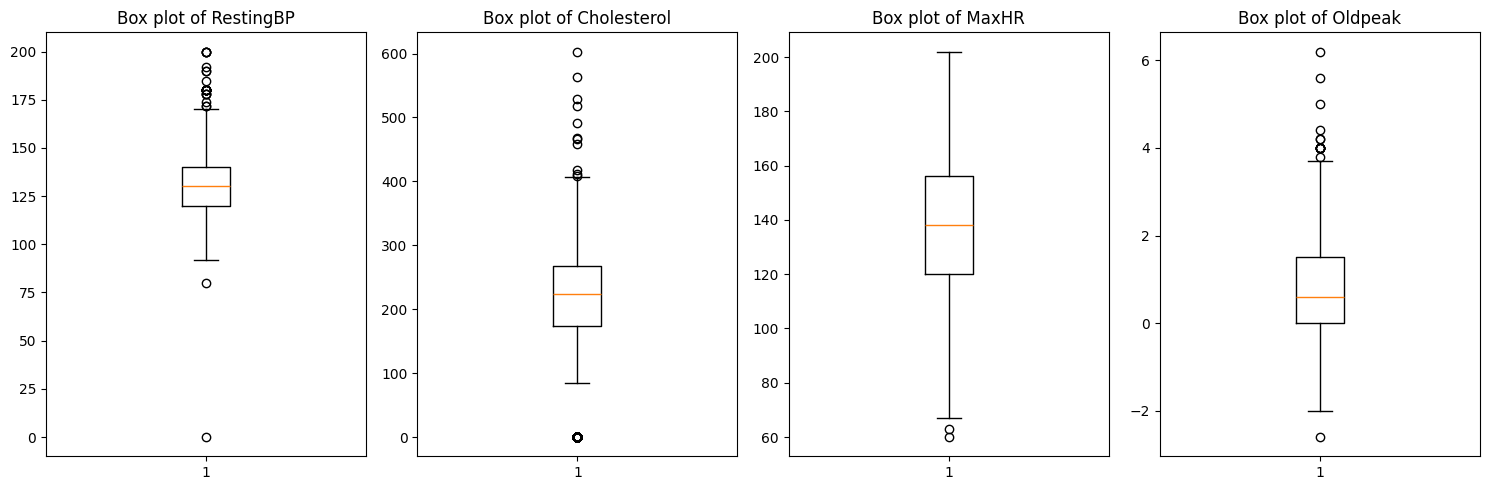


--- Outlier Detection using IQR ---
RestingBP:
  Q1 = 120.00, Q3 = 140.00, IQR = 20.00
  Lower bound = 90.00, Upper bound = 170.00
  Number of outliers: 28 (3.1%)
Cholesterol:
  Q1 = 173.25, Q3 = 267.00, IQR = 93.75
  Lower bound = 32.62, Upper bound = 407.62
  Number of outliers: 183 (19.9%)
MaxHR:
  Q1 = 120.00, Q3 = 156.00, IQR = 36.00
  Lower bound = 66.00, Upper bound = 210.00
  Number of outliers: 2 (0.2%)
Oldpeak:
  Q1 = 0.00, Q3 = 1.50, IQR = 1.50
  Lower bound = -2.25, Upper bound = 3.75
  Number of outliers: 16 (1.7%)

--- Removing Outliers ---
Shape before removing outliers: (918, 15)
RestingBP:
  Q1 = 120.00, Q3 = 140.00, IQR = 20.00
  Lower bound = 90.00, Upper bound = 170.00
  Number of outliers: 28 (3.1%)
Shape after removing RestingBP outliers: (890, 15)
Cholesterol:
  Q1 = 174.25, Q3 = 265.75, IQR = 91.50
  Lower bound = 37.00, Upper bound = 403.00
  Number of outliers: 177 (19.9%)
Shape after removing Cholesterol outliers: (713, 15)

Outliers removed for RestingBP an

In [23]:
# YOUR CODE HERE
# Hint: You can reuse the detect_outliers_iqr function from above
# Then create box plots with plt.boxplot()
def detect_outliers_iqr(data, column):
    """Detect outliers using the IQR method. Returns a boolean mask."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    print(f'{column}:')
    print(f'  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
    print(f'  Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}')
    print(f'  Number of outliers: {outliers.sum()} ({outliers.sum()/len(data)*100:.1f}%)')
    return outliers

# Select numerical columns for outlier detection.
numerical_cols_for_outliers = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] # We'll use these 4 as examples

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(1, len(numerical_cols_for_outliers), i + 1)
    plt.boxplot(heart_clean[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

print('\n--- Outlier Detection using IQR ---')
# Detect and print outlier counts for selected columns
for col in numerical_cols_for_outliers:
    detect_outliers_iqr(heart_clean, col)


print('\n--- Removing Outliers ---')
print(f'Shape before removing outliers: {heart_clean.shape}')

# Remove outliers for 'RestingBP'
restingbp_outliers = detect_outliers_iqr(heart_clean, 'RestingBP')
heart_clean = heart_clean[~restingbp_outliers] # Keep rows that are NOT outliers
print(f'Shape after removing RestingBP outliers: {heart_clean.shape}')

# Remove outliers for 'Cholesterol'
cholesterol_outliers = detect_outliers_iqr(heart_clean, 'Cholesterol')
heart_clean = heart_clean[~cholesterol_outliers] # Keep rows that are NOT outliers
print(f'Shape after removing Cholesterol outliers: {heart_clean.shape}')

print('\nOutliers removed for RestingBP and Cholesterol.')

### Step 8: Scale the numerical features

Apply Min-Max scaling to the numerical columns (not the target column).

In [26]:
# YOUR CODE HERE
# Hint: Follow the same pattern from Section 8 of the tutorial
from sklearn.preprocessing import MinMaxScaler

# Get the numerical columns to scale
# We exclude 'HeartDisease' (target) and the one-hot columns (already 0/1)
# We also exclude 'Sex' and 'ExerciseAngina' as they are binary (0/1) mappings
num_cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Make a copy so we don't modify our cleaned data directly during scaling
df_scaled = heart_clean.copy()

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_scaled[num_cols_to_scale] = scaler.fit_transform(df_scaled[num_cols_to_scale])

print('Scaled data (first 5 rows):')
print(df_scaled[num_cols_to_scale].head())

Scaled data (first 5 rows):
        Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0  0.244898   0.615385     0.660194  0.770992  0.015873
1  0.428571   0.871795     0.307443  0.648855  0.174603
2  0.183673   0.487179     0.640777  0.206107  0.015873
3  0.408163   0.589744     0.417476  0.282443  0.253968
4  0.530612   0.743590     0.355987  0.389313  0.015873


### Reflection Questions

After completing the exercise, answer these questions (add a text cell or answer here):

1. How did the Heart Disease dataset compare to the Titanic dataset in terms of data quality? **The Heart Disease dataset requires significantly less cleaning than the Titanic dataset because it consists entirely of numeric values with almost no missing information.**
2. Which missing value strategy did you use, and why? **I dropped the column FastingBP entirely. It was the only column that had a bunch of placeholder values.**
3. Did you find any outliers? Did you remove them? Why or why not? **Yes, outliers were found in 'RestingBP', 'Cholesterol', 'MaxHR', and 'Oldpeak'. I specifically removed outliers from 'RestingBP' and 'Cholesterol' because these columns contained biologically impossible '0' values and/or a high percentage of extreme values that were likely data errors or anomalies.**
4. If you were building a model to predict heart disease, which columns do you think would be most important? **Based on medical relevance, columns like 'Age', 'RestingBP', 'Cholesterol', 'ChestPainType', 'ST_Slope', 'ExerciseAngina', 'Oldpeak', and 'MaxHR' would likely be highly important for predicting heart disease. These features directly relate to indicators and symptoms of heart conditions.**

---
*Great work! You now have hands-on experience with a complete data cleaning pipeline.* Dr. Thompson